In [55]:
>>> import numpy as np
>>> from sklearn.decomposition import PCA
>>> X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2],[4,4]])
>>> pca = PCA(n_components=2) #combine 2 features into 2,do pca
>>> pca2=PCA(n_components=1)

X_transformed=pca.fit_transform(X)
X_transformed2=pca2.fit_transform(X)

print 'transformed X with 2pc'
print X_transformed
print 'transformed X1 with 1pc'
print X_transformed2

print ''
print 'pc vectors with direction and importance'
pc=pca.components_    #2 components are perpendicular to each other
first_pc=pca.components_[0]  
second_pc=pca.components_[1]
print pc



transformed X with 2pc
[[-2.205396   -0.27386859]
 [-2.99425291  0.34070831]
 [-4.39768673  0.1664283 ]
 [ 0.60147164  0.07469143]
 [ 1.39032855 -0.53988547]
 [ 2.79376237 -0.36560546]
 [ 4.81177309  0.59753147]]
transformed X1 with 1pc
[[-2.205396  ]
 [-2.99425291]
 [-4.39768673]
 [ 0.60147164]
 [ 1.39032855]
 [ 2.79376237]
 [ 4.81177309]]

pc vectors with direction and importance
[[ 0.78885691  0.6145769 ]
 [-0.6145769   0.78885691]]


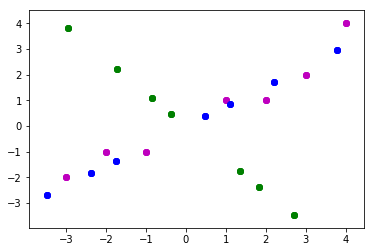

In [63]:
import matplotlib.pyplot as plt
for ii in X:
    #plot original data
    plt.scatter(ii[0],ii[1],color='m')

for jj in X_transformed:
    #plot first pc
    plt.scatter(jj[0]*first_pc[0],jj[0]*first_pc[1],color='b')
    #plot second pc
    plt.scatter(jj[0]*second_pc[0],jj[0]*second_pc[1],color='g')
'''
for ii in X_transformed2:
    #plot original data
    plt.scatter(ii[0],ii[0],color='k')
plt.show() 
'''
plt.show()

In [61]:
print 'eigenvalues'
print pca.explained_variance_ratio_   #variance ratio(importance)-eigenvalues
print pca.explained_variance_ratio_.sum()

eigenvalues
[ 0.98507234  0.01492766]
1.0


http://scikit-learn.org/0.18/auto_examples/feature_stacker.html#sphx-glr-auto-examples-feature-stacker-py

In [11]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectPercentile,SelectKBest
from sklearn.decomposition import PCA
iris=load_iris()
feature,target=iris.data,iris.target
print feature.shape

feature_newP=SelectPercentile(percentile=50).fit_transform(feature,target)
print feature_newP.shape

feature_newK=SelectKBest(k=3).fit_transform(feature,target)
print feature_newK.shape

pca = PCA(n_components=2)
feature_pca=pca.fit_transform(feature,target)
print feature_pca.shape

(150L, 4L)
(150L, 2L)
(150L, 3L)
(150L, 2L)


In [8]:
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.datasets import load_iris
iris=load_iris()
feature,target=iris.data,iris.target

pca=PCA(n_components=2)#减少examles
select=SelectKBest(k=3)#减少feature
combined_select=FeatureUnion([("pca",pca),("select",select)])
feature_new=combined_select.fit_transform(feature,target)
print feature_new

[[-2.68420713  0.32660731  5.1         1.4         0.2       ]
 [-2.71539062 -0.16955685  4.9         1.4         0.2       ]
 [-2.88981954 -0.13734561  4.7         1.3         0.2       ]
 [-2.7464372  -0.31112432  4.6         1.5         0.2       ]
 [-2.72859298  0.33392456  5.          1.4         0.2       ]
 [-2.27989736  0.74778271  5.4         1.7         0.4       ]
 [-2.82089068 -0.08210451  4.6         1.4         0.3       ]
 [-2.62648199  0.17040535  5.          1.5         0.2       ]
 [-2.88795857 -0.57079803  4.4         1.4         0.2       ]
 [-2.67384469 -0.1066917   4.9         1.5         0.1       ]
 [-2.50652679  0.65193501  5.4         1.5         0.2       ]
 [-2.61314272  0.02152063  4.8         1.6         0.2       ]
 [-2.78743398 -0.22774019  4.8         1.4         0.1       ]
 [-3.22520045 -0.50327991  4.3         1.1         0.1       ]
 [-2.64354322  1.1861949   5.8         1.2         0.2       ]
 [-2.38386932  1.34475434  5.7         1.5         0.4 